In [21]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons 
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')

In [22]:
def marchpast(l, g,sigma):
    "Marchenko-Pastur distribution"
    
    def m0(a):
        "Element wise maximum of (a,0)"
        return np.maximum(a, np.zeros_like(a))
    gplus=(sigma*(1+g**0.5))**2
    gminus=(sigma*(1-g**0.5))**2
    return np.sqrt(  m0(gplus  - l) *  m0(l- gminus)) / ( 2*np.pi*g*l*(sigma**2))




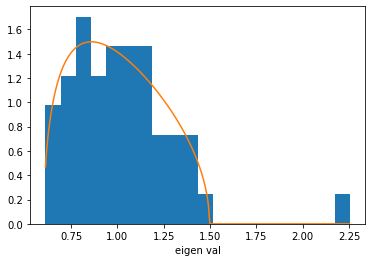

0.06978258267602636

In [23]:
def egen_of_marco(n,p,sigma):
    v = np.zeros(p)
    v[0] = 1
    alpha_1 = np.random.normal(0,1)
    qxi_1 = np.random.multivariate_normal(np.zeros(p),np.diag(np.ones(p)))
    X = alpha_1*v+sigma*qxi_1
    for i in range(n-1):
        alpha_i = np.random.normal(0,1)
        qxi = np.random.multivariate_normal(np.zeros(p),np.diag(np.ones(p)))
        X = np.column_stack((X,(alpha_i*v+sigma*qxi))) 
    R = X@X.T
    R = R/n
    egen_val = -np.sort(-np.linalg.eigvals(R))
    fig, ax = plt.subplots()  # plt.subplots()
    aa,bb,_ = plt.hist(egen_val,bins=20,density=True)
    x=np.arange(bb[0], bb[-1], 0.003)
    plt.plot(x,marchpast(x,p/n,sigma))
    plt.xlabel("eigen val")
    plt.show()  
    sigma_op = np.arange(0.2,2.2,0.2)
    vals,vector = np.linalg.eig(R)
    largest_eigenvector = vector[:, np.argmax(vals)]
    return largest_eigenvector,v
egen_of_marco(1000,50,1)[0][1]

In [26]:
n=300
p=50
v = np.zeros(p)
v[13] = 1
alphas = np.random.normal(0,1)
qxis = np.random.multivariate_normal(np.zeros(p),np.diag(np.ones(p)))
#X = alpha_1*v+sigma*qxi_1


for i in range(n-1):
    alphas =  np.append(alphas,np.random.normal(0,1))
    qxis = np.column_stack((qxis,np.random.multivariate_normal(np.zeros(p),np.diag(np.ones(p))))) 
    

                     
def generate_x_by_sig(sigma):
    x = alphas[0]*v+sigma*qxis[:,0]
    for i in range(1,n):
        x = np.column_stack((x,alphas[i]*v+sigma*qxis[:,i]))
    R = x@x.T
    R = R/n
    return R

    


In [27]:
def vec_per_sig(R):
    vals,vectors = np.linalg.eig(R)
    largest_eigenvector = vectors[:, np.argmax(vals)]   
    return largest_eigenvector
    
def plot_for_sigmas(sigmas):
    dot_val = np.zeros(sigmas.size)
    count = 0
    for i in sigmas:
        dot_val[count]=np.inner(v,vec_per_sig(generate_x_by_sig(i)))
        count+=1
    plt.plot(sigmas,np.absolute(dot_val))
    plt.xlabel("sigma")
    plt.ylabel("inner product with leading eigenvec")

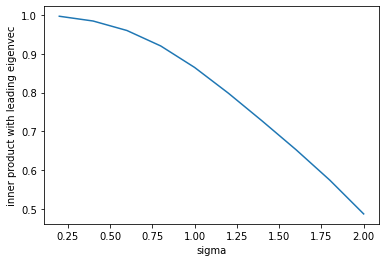

In [28]:
plot_for_sigmas(np.arange(0.2,2.2,0.2))

In [29]:
moon_data = make_moons(100)


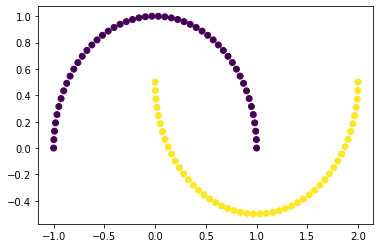

In [30]:
plt.scatter(moon_data[0][:,0],moon_data[0][:,1], c = moon_data[1])

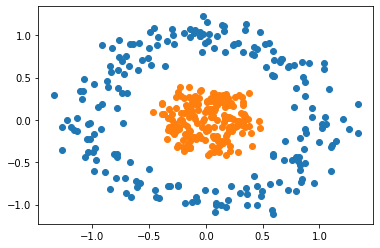

In [34]:
n=200
noise_1 = np.random.normal(0,0.1,n)
noise_2 = np.random.normal(0,0.15,n)
keta_1 = np.random.uniform(0,np.pi*2)
for i in range(n-1):
    keta_1 =  np.append(keta_1,np.random.uniform(0,2*np.pi))

x_1=np.cos(keta_1)+noise_2
y_1=np.sin(keta_1)+noise_1

noise_2 = np.random.normal(0,0.1,n)
keta_2 = np.random.uniform(0,np.pi*2)
for i in range(n-1):
    keta_2 =  np.append(keta_2,np.random.uniform(0,2*np.pi))

x_2=np.cos(keta_2)/4+noise_2
y_2=np.sin(keta_2)/4+noise_1

circels = (np.column_stack((np.append(x_1,x_2),np.append(y_1,y_2))),np.append(np.zeros(200),np.ones(200)))

plt.scatter(x_1,y_1)
plt.scatter(x_2,y_2)


In [36]:
ker_pca = KernelPCA(n_components=2,kernel = "rbf",gamma = 50)

In [37]:
low_dim_moon = ker_pca.fit_transform(moon_data[0])

Text(0.5, 1.0, 'gaussian kernel PCA ')

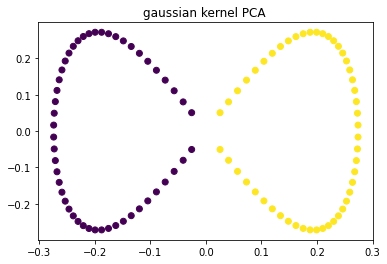

In [38]:
plt.scatter(low_dim_moon[:,0],low_dim_moon[:,1],c = moon_data[1])
plt.title("gaussian kernel PCA ")

Text(0.5, 1.0, 'gaussian kernel PCA ')

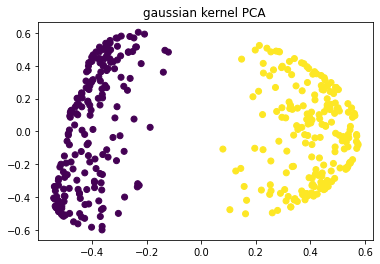

In [39]:
ker_pca = KernelPCA(n_components=2,kernel = "rbf",gamma = 2.5)
low_dim_circ = ker_pca.fit_transform(circels[0])
plt.scatter(low_dim_circ[:,0],low_dim_circ[:,1],c = circels[1])
plt.title("gaussian kernel PCA ")


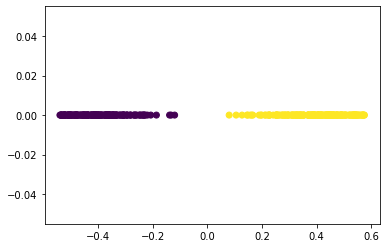

In [40]:
ker_pca = KernelPCA(n_components=1,kernel = "rbf",gamma = 2.5)
low_dim_circ = ker_pca.fit_transform(circels[0])
plt.scatter(low_dim_circ,np.zeros(low_dim_circ.shape),c = circels[1])


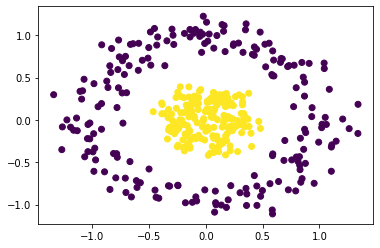

In [41]:
plt.scatter(circels[0][:,0],circels[0][:,1],c=circels[1])

In [42]:
moon_data_2 = make_moons(2000)
moon_data_2[0].shape

(2000, 2)

In [43]:
random_idx = np.random.randint(0,2000,500)

In [44]:
def nystrom_method(data,gamma,rand_indx):
    kernal_mat = rbf_kernel(data,gamma=gamma)
    approx_ker = kernal_mat[:,rand_indx] 
    kaa = approx_ker[rand_indx,:]
    psaudo_kaa = np.linalg.pinv(kaa)
    nystrom_exst = approx_ker@psaudo_kaa@approx_ker.T
    nystrom_exst = np.round(nystrom_exst,decimals=4)
    eg_vals,eg_vectors = np.linalg.eig(nystrom_exst)
    largest_eigenvector = eg_vectors[:, 0:2]
    largest_eigenvector = np.float64(largest_eigenvector)
    low_dim_apprx = largest_eigenvector.T@nystrom_exst
    return low_dim_apprx

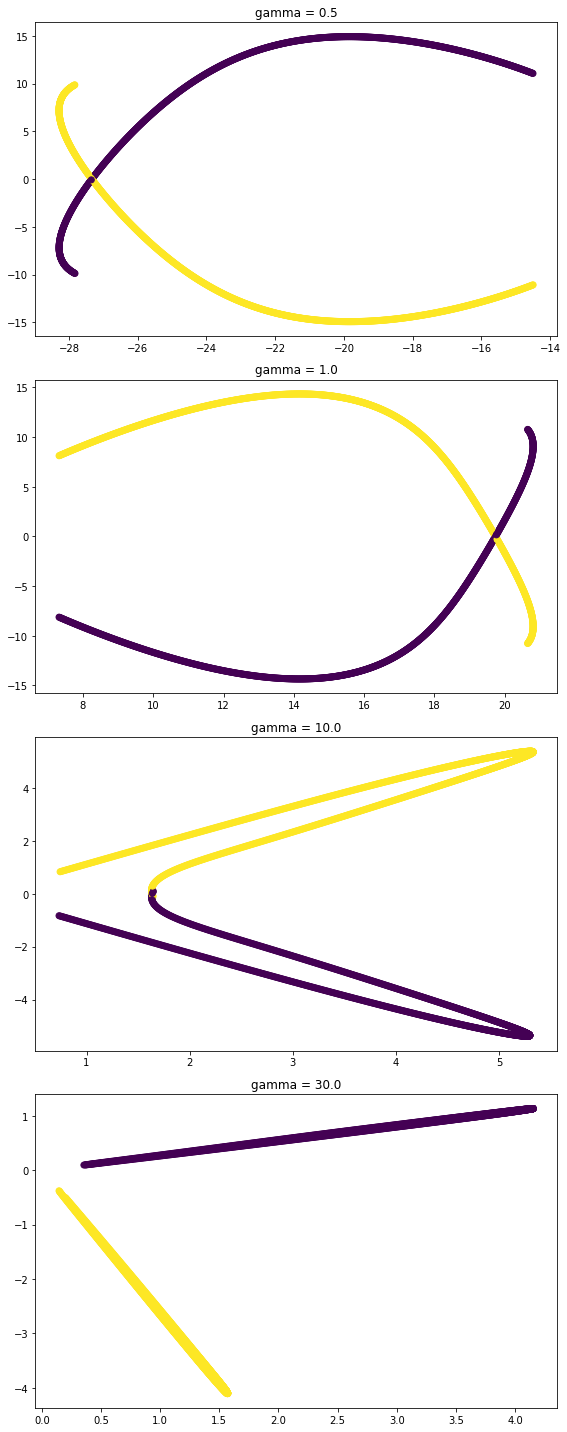

In [46]:
optinoal_gamma = np.array([0.5,1,10,30])
fig,axes = plt.subplots(nrows=optinoal_gamma.size,ncols=1,figsize=(8,20))
axes = axes.flat
for i,gamma in enumerate(optinoal_gamma):
    magic = nystrom_method(moon_data_2[0],gamma,random_idx)
    axes[i].scatter(magic[0,:],magic[1,:],c = moon_data_2[1])
    axes[i].set_title(f"gamma = {gamma}")

fig.tight_layout()
    

In [47]:
left_indx = np.argwhere(moon_data_2[1]==0).reshape(1000)

In [48]:
idx_2 = np.random.choice(left_indx,500)

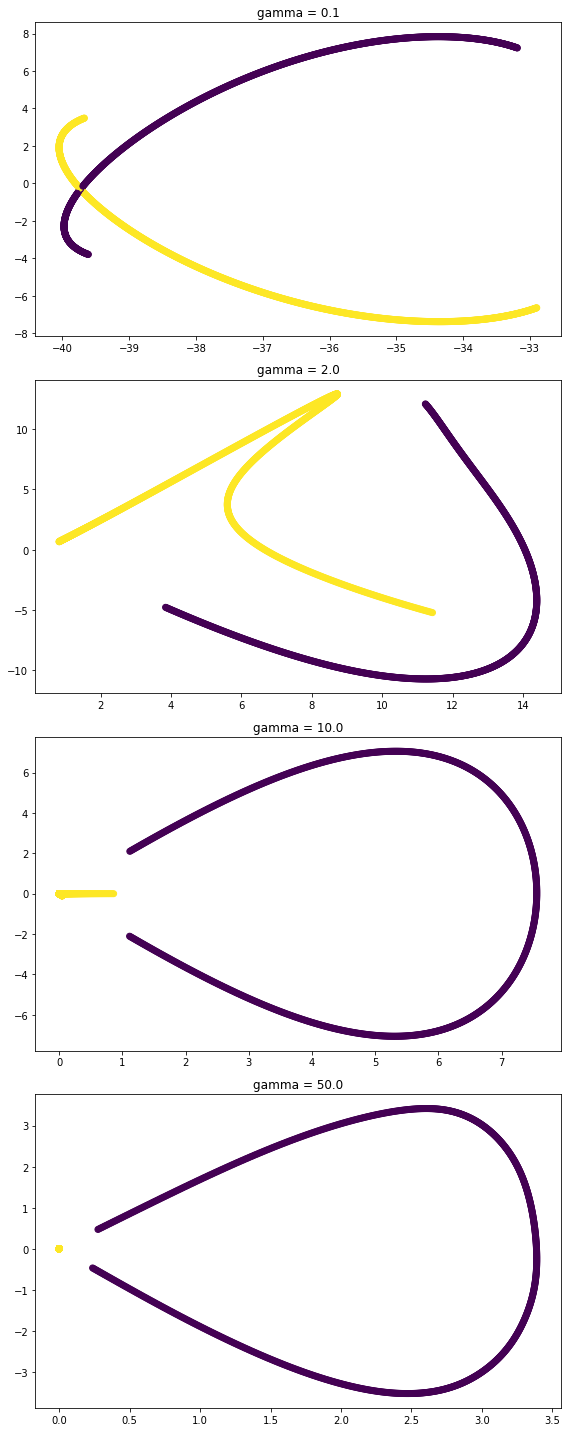

In [49]:
optinoal_gamma_2 = np.array([0.1,2,10,50])
fig,axes = plt.subplots(nrows=optinoal_gamma_2.size,ncols=1,figsize=(8,20))
axes = axes.flat
for i,gamma in enumerate(optinoal_gamma_2):
    magic = nystrom_method(moon_data_2[0],gamma,idx_2)
    axes[i].scatter(magic[0,:],magic[1,:],c = moon_data_2[1])
    axes[i].set_title(f"gamma = {gamma}")
fig.tight_layout()